In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import os
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [7]:
PATH = 'data/'
filename = 'airlines.csv'
file = os.path.join(PATH, filename)

In [9]:
df_raw = pd.read_csv(file, sep=',')

In [10]:
df_raw.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [11]:
df_raw.describe()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
count,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,1.384621e+09,7.178571,2.178571,112.410714,4.125000,0.660714,55.517857
std,1.465317e+09,11.035656,2.861069,146.691114,4.544977,0.858684,111.332751
min,2.593733e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.740362e+08,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8.029089e+08,4.000000,1.000000,48.500000,3.000000,0.000000,0.000000
75%,1.847239e+09,8.000000,3.000000,184.250000,5.250000,1.000000,83.250000
max,7.139291e+09,76.000000,14.000000,535.000000,24.000000,3.000000,537.000000


In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 56 non-null     object
 1   avail_seat_km_per_week  56 non-null     int64 
 2   incidents_85_99         56 non-null     int64 
 3   fatal_accidents_85_99   56 non-null     int64 
 4   fatalities_85_99        56 non-null     int64 
 5   incidents_00_14         56 non-null     int64 
 6   fatal_accidents_00_14   56 non-null     int64 
 7   fatalities_00_14        56 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 3.6+ KB


In [13]:
df_raw.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

In [38]:
# Number of planes each airline own
df_raw['airline'].value_counts()

Air India*                    1
Ethiopian Airlines            1
Virgin Atlantic               1
China Airlines                1
All Nippon Airways            1
British Airways*              1
Korean Air                    1
Lufthansa*                    1
Aeromexico*                   1
Condor                        1
Southwest Airlines            1
Kenya Airways                 1
American*                     1
Malaysia Airlines             1
Pakistan International        1
US Airways / America West*    1
Air France                    1
COPA                          1
Singapore Airlines            1
Sri Lankan / AirLanka         1
Qantas*                       1
KLM*                          1
Air New Zealand*              1
Alaska Airlines*              1
Turkish Airlines              1
Iberia                        1
LAN Airlines                  1
United / Continental*         1
South African                 1
Air Canada                    1
SAS*                          1
Aer Ling

In [36]:
#total number of airlines
df_raw['airline'].nunique()

56

###  Airlines with incidents greater than 10, with number 85_99
The plot below show bar plots of airlines with various degree of incidents for incidents_85_99

In [78]:
# Getting only airlines with high number of incidents (threshold set at 10)
high = df_raw[df_raw['incidents_85_99'] >10]
high

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
1,Aeroflot*,1197672318,76,14,128,6,1,88
5,Air France,3004002661,14,4,79,6,2,337
11,American*,5228357340,21,5,101,17,3,416
16,China Airlines,813216487,12,6,535,2,1,225
19,Delta / Northwest*,6525658894,24,12,407,24,2,51
22,Ethiopian Airlines,488560643,25,5,167,5,2,92
31,Korean Air,1734522605,12,5,425,1,0,0
51,United / Continental*,7139291291,19,8,319,14,2,109
52,US Airways / America West*,2455687887,16,7,224,11,2,23


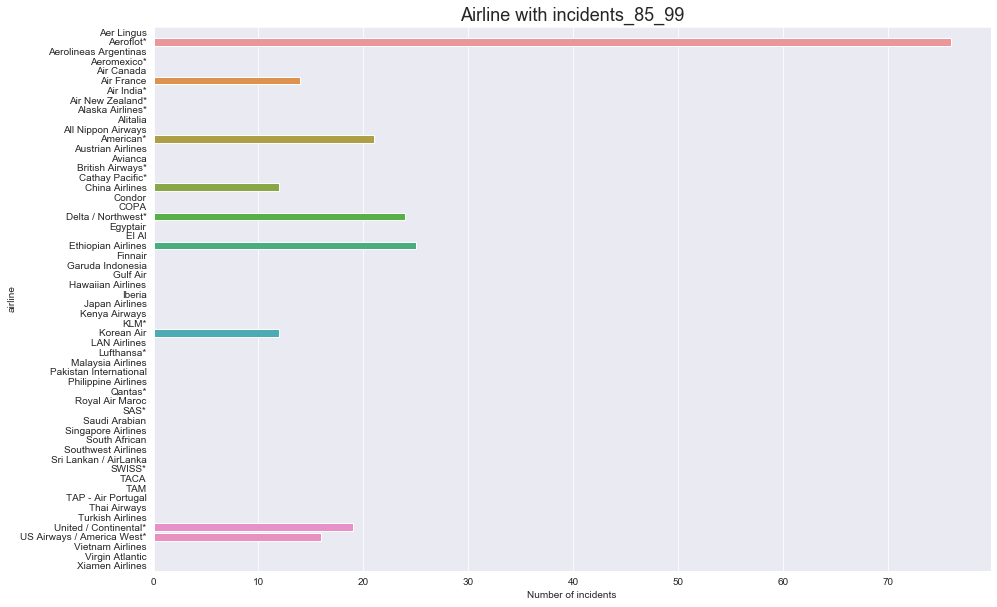

In [82]:
plt.figure(figsize=(15, 10))
sns.barplot(high['incidents_85_99'], df_raw['airline'])
plt.title('Airline with incidents_85_99', fontsize=18)
plt.xlabel('Number of incidents', fontsize=10)
plt.show()

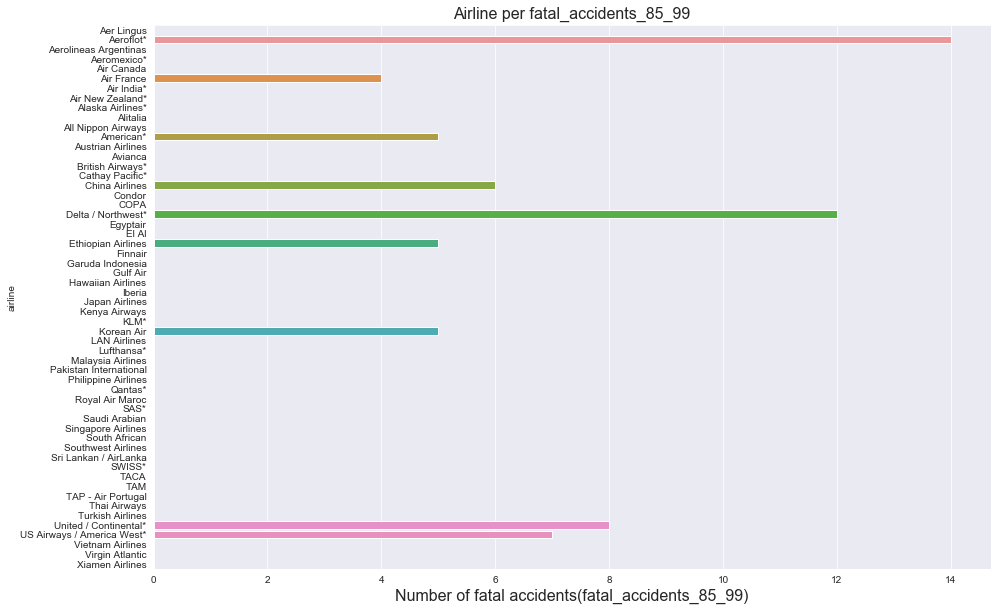

In [84]:
plt.figure(figsize=(15, 10))
sns.barplot(high['fatal_accidents_85_99'], df_raw['airline'])
plt.title('Airline per fatal_accidents_85_99', fontsize=16)
plt.xlabel('Number of fatal accidents(fatal_accidents_85_99)', fontsize=16)
plt.show()

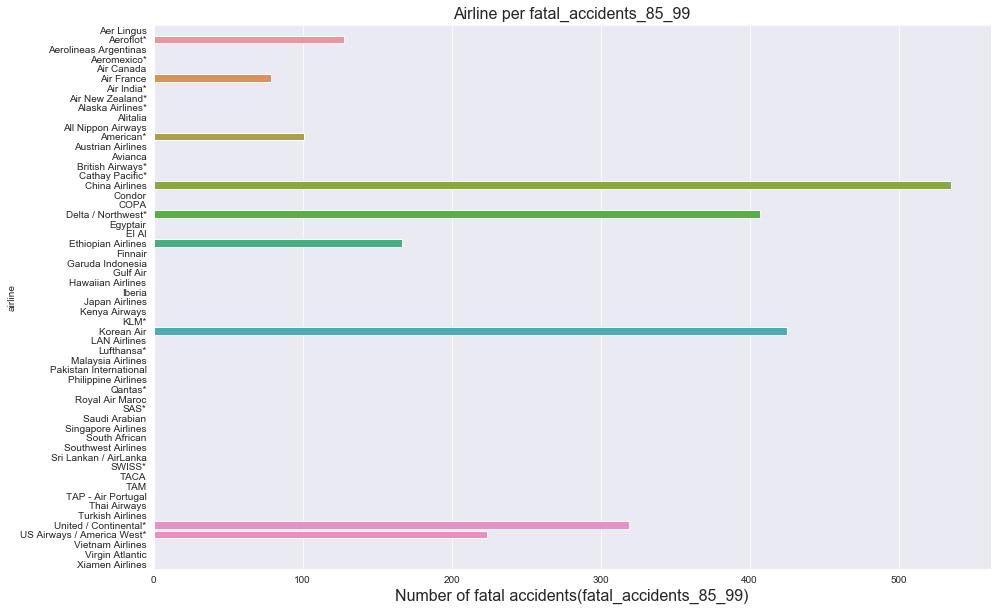

In [85]:
plt.figure(figsize=(15, 10))
sns.barplot(high['fatalities_85_99'], df_raw['airline'])
plt.title('Airline per fatalities', fontsize=16)
plt.xlabel('Number of fatalities)', fontsize=16)
plt.show()

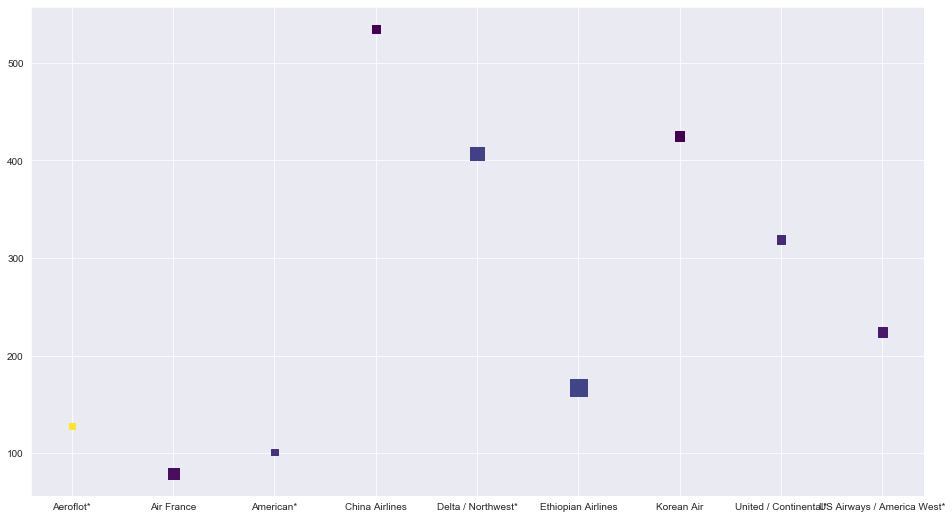

In [254]:
plt.figure(figsize=(16, 9))
plt.scatter(high['airline'], high['fatalities_85_99'], 
            c=high['incidents_85_99'],s=number_of_seat,
            cmap='viridis', alpha=1, marker='s')
plt.show()

The graph above shows the ratio of the number fatailies to number the number of occured incidents for each airline.where the following is noted
>
    1. Chine Airline has the highest number of fatailes for a high number of incidents.
    2. Ethiopian Airlines has the highest number of incidents but only little resulted in a fatality.
    3. Air France seems to be the safety airline with low number of incidents and fatalities.

### Available number of seats for each airline for every kilometers travelled per week

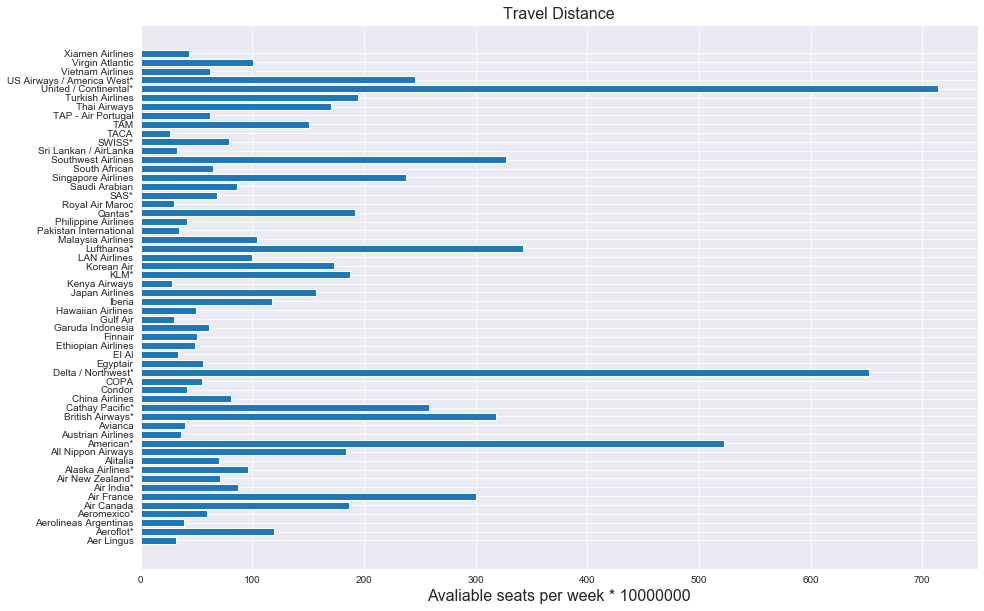

In [205]:
number_of_seat = df_raw.avail_seat_km_per_week/1e7

plt.figure(figsize=(15,10))
plt.barh('airline', number_of_seat, data=df_raw)
plt.title('Travel Distance', fontsize=16)
plt.xlabel('Avaliable seats per week * 10000000', fontsize=16)
plt.show()

In [204]:
# Which airline has the highest number of seat per week and by how much
print('|----------------------------------------|')
print('|AIRLINE              :  Number of seats |')
print('|----------------------------------------|')
for name, seat in zip(df_raw['airline'], df_raw['avail_seat_km_per_week']):
    if seat == df_raw['avail_seat_km_per_week'].max():
        print(f'| {name}: {seat}      |')
        print('|----------------------------------------|')

|----------------------------------------|
|AIRLINE              :  Number of seats |
|----------------------------------------|
| United / Continental*: 7139291291      |
|----------------------------------------|
